In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim, utils
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
dataset = pd.read_csv("/content/simpsons_script_lines.csv", engine = "python", on_bad_lines = "skip")
dataset.head()

id  episode_id  number  \
0  9549          32     209   
1  9550          32     210   
2  9551          32     211   
3  9552          32     212   
4  9553          32     213   

                                            raw_text  timestamp_in_ms  \
0  Miss Hoover: No, actually, it was a little of ...           848000   
1  Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?           856000   
2  Miss Hoover: I don't know. Although I'd sure l...           856000   
3           Lisa Simpson: That life is worth living.           864000   
4  Edna Krabappel-Flanders: The polls will be ope...           864000   

   speaking_line  character_id  location_id       raw_character_text  \
0           True         464.0          3.0              Miss Hoover   
1           True           9.0          3.0             Lisa Simpson   
2           True         464.0          3.0              Miss Hoover   
3           True           9.0          3.0             Lisa Simpson   
4           True          40.0          3.0  Edna Krabappel-Flanders   

               raw_location_text  \
0  Springfield Elementary School   
1  Springfield Elementary School   
2  Springfield Elementary School   
3  Springfield Elementary School   
4  Springfield Elementary School   

                                        spoken_words  \
0  No, actually, it was a little of both. Sometim...   
1                             Where's Mr. Bergstrom?   
2  I don't know. Although I'd sure like to talk t...   
3                         That life is worth living.   
4  The polls will be open from now until the end ...   

                                     normalized_text  word_count  
0  no actually it was a little of both sometimes ...        31.0  
1                                wheres mr bergstrom         3.0  
2  i dont know although id sure like to talk to h...        22.0  
3                          that life is worth living         5.0  
4  the polls will be open from now until the end ...        33.0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157612 entries, 0 to 157611
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  157612 non-null  int64  
 1   episode_id          157612 non-null  int64  
 2   number              157612 non-null  int64  
 3   raw_text            157612 non-null  object 
 4   timestamp_in_ms     157612 non-null  int64  
 5   speaking_line       157612 non-null  bool   
 6   character_id        140118 non-null  float64
 7   location_id         157209 non-null  float64
 8   raw_character_text  140118 non-null  object 
 9   raw_location_text   157209 non-null  object 
 10  spoken_words        131497 non-null  object 
 11  normalized_text     131473 non-null  object 
 12  word_count          131497 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 14.6+ MB


In [ ]:
normalized_text = dataset["normalized_text"].dropna().tolist()
normalized_text

['no actually it was a little of both sometimes when a disease is in all the magazines and all the news shows its only natural that you think you have it',
 'wheres mr bergstrom',
 'i dont know although id sure like to talk to him he didnt touch my lesson plan what did he teach you',
 'that life is worth living',
 'the polls will be open from now until the end of recess now just in case any of you have decided to put any thought into this well have our final statements martin',
 'i dont think theres anything left to say',
 'bart',
 'victory party under the slide',
 'mr bergstrom mr bergstrom',
 'hey hey he moved out this morning he must have a new job -- he took his copernicus costume',
 'do you know where i could find him',
 'i think hes taking the next train to capital city',
 'the train how like him traditional yet environmentally sound',
 'yes and its been the backbone of our country since leland stanford drove that golden spike at promontory point',
 'i see he touched you too',
 '

In [ ]:
len(normalized_text)

131473

In [ ]:
normalized_text_2 = [x.split() for x in normalized_text]

In [ ]:
normalized_text_2

[['no',
  'actually',
  'it',
  'was',
  'a',
  'little',
  'of',
  'both',
  'sometimes',
  'when',
  'a',
  'disease',
  'is',
  'in',
  'all',
  'the',
  'magazines',
  'and',
  'all',
  'the',
  'news',
  'shows',
  'its',
  'only',
  'natural',
  'that',
  'you',
  'think',
  'you',
  'have',
  'it'],
 ['wheres', 'mr', 'bergstrom'],
 ['i',
  'dont',
  'know',
  'although',
  'id',
  'sure',
  'like',
  'to',
  'talk',
  'to',
  'him',
  'he',
  'didnt',
  'touch',
  'my',
  'lesson',
  'plan',
  'what',
  'did',
  'he',
  'teach',
  'you'],
 ['that', 'life', 'is', 'worth', 'living'],
 ['the',
  'polls',
  'will',
  'be',
  'open',
  'from',
  'now',
  'until',
  'the',
  'end',
  'of',
  'recess',
  'now',
  'just',
  'in',
  'case',
  'any',
  'of',
  'you',
  'have',
  'decided',
  'to',
  'put',
  'any',
  'thought',
  'into',
  'this',
  'well',
  'have',
  'our',
  'final',
  'statements',
  'martin'],
 ['i', 'dont', 'think', 'theres', 'anything', 'left', 'to', 'say'],
 ['bar

In [ ]:
model = Word2Vec(sentences = normalized_text_2, vector_size=300, window=7, min_count=2, workers=4, epochs = 100)
model.save("word2vec.model")

In [ ]:
word_vectors = model.wv

In [ ]:
word_vectors["washed"]

array([-0.36992186,  0.5911605 , -2.2268193 ,  1.1094967 , -0.15707937,
        0.03903013, -1.956329  , -1.0224899 , -0.7258225 ,  0.08199938,
       -0.36800694, -1.6609503 , -0.74549484, -0.4082084 ,  0.26058388,
       -1.7682157 ,  1.3281432 ,  1.3564652 , -1.6048372 ,  1.703386  ,
       -1.0372416 ,  2.2664382 ,  1.2282921 ,  1.3793758 ,  0.35251543,
        0.9365267 ,  0.02624757, -1.2457408 ,  0.25200045, -1.0131243 ,
        1.2832716 ,  0.35008842,  1.7127229 , -1.0417852 , -0.79922336,
        1.1097815 , -0.5930099 , -0.47489056, -0.3435367 , -0.41910544,
        0.9139921 , -0.62922496,  0.5718123 , -1.4243981 ,  0.05100005,
       -0.88203174, -0.1332127 ,  1.4330349 , -1.2192625 , -0.25079712,
       -0.39010945, -1.0112203 , -0.67126095, -0.26804593, -0.71302575,
       -0.50275266,  1.6575242 , -2.0233843 , -0.31635925,  2.11726   ,
        0.5981831 , -2.4454918 , -0.99176323, -0.42416763, -0.95687747,
       -0.14050442,  0.6440893 , -0.01782897, -0.19254622, -0.36

In [ ]:
counter = []
for sentences in normalized_text_2:
  for word in sentences:
    counter.append(word)
counter = Counter(counter)
counter

Counter({'no': 7423,
         'actually': 466,
         'it': 13925,
         'was': 5457,
         'a': 30956,
         'little': 2570,
         'of': 16156,
         'both': 306,
         'sometimes': 171,
         'when': 2397,
         'disease': 37,
         'is': 12353,
         'in': 12615,
         'all': 6703,
         'the': 41682,
         'magazines': 30,
         'and': 19159,
         'news': 301,
         'shows': 146,
         'its': 6875,
         'only': 1677,
         'natural': 75,
         'that': 12680,
         'you': 37243,
         'think': 2838,
         'have': 7484,
         'wheres': 383,
         'mr': 1601,
         'bergstrom': 19,
         'i': 35640,
         'dont': 6850,
         'know': 4708,
         'although': 100,
         'id': 1127,
         'sure': 1481,
         'like': 5938,
         'to': 27162,
         'talk': 646,
         'him': 2416,
         'he': 3578,
         'didnt': 1404,
         'touch': 148,
         'my': 12656,
         'le

In [ ]:
counter.most_common(1000)

[('the', 41682),
 ('you', 37243),
 ('i', 35640),
 ('a', 30956),
 ('to', 27162),
 ('and', 19159),
 ('of', 16156),
 ('it', 13925),
 ('that', 12680),
 ('my', 12656),
 ('in', 12615),
 ('is', 12353),
 ('this', 11636),
 ('me', 10857),
 ('your', 10423),
 ('for', 10107),
 ('im', 9398),
 ('we', 8225),
 ('on', 8182),
 ('oh', 8154),
 ('what', 7692),
 ('have', 7484),
 ('no', 7423),
 ('but', 7319),
 ('be', 7147),
 ('well', 7005),
 ('its', 6875),
 ('dont', 6850),
 ('all', 6703),
 ('just', 6655),
 ('with', 6395),
 ('are', 6373),
 ('do', 6370),
 ('now', 6006),
 ('not', 5992),
 ('like', 5938),
 ('so', 5848),
 ('was', 5457),
 ('get', 5204),
 ('youre', 5027),
 ('can', 4967),
 ('know', 4708),
 ('one', 4636),
 ('at', 4509),
 ('thats', 4456),
 ('out', 4396),
 ('up', 4395),
 ('here', 4372),
 ('hey', 4286),
 ('if', 4185),
 ('homer', 4072),
 ('right', 4029),
 ('were', 3824),
 ('go', 3710),
 ('got', 3699),
 ('he', 3578),
 ('our', 3364),
 ('how', 3359),
 ('--', 3331),
 ('about', 3293),
 ('bart', 3286),
 ('ill', 

In [ ]:
top_1000 = [x[0] for x in counter.most_common(1000)]
top_1000

['the',
 'you',
 'i',
 'a',
 'to',
 'and',
 'of',
 'it',
 'that',
 'my',
 'in',
 'is',
 'this',
 'me',
 'your',
 'for',
 'im',
 'we',
 'on',
 'oh',
 'what',
 'have',
 'no',
 'but',
 'be',
 'well',
 'its',
 'dont',
 'all',
 'just',
 'with',
 'are',
 'do',
 'now',
 'not',
 'like',
 'so',
 'was',
 'get',
 'youre',
 'can',
 'know',
 'one',
 'at',
 'thats',
 'out',
 'up',
 'here',
 'hey',
 'if',
 'homer',
 'right',
 'were',
 'go',
 'got',
 'he',
 'our',
 'how',
 '--',
 'about',
 'bart',
 'ill',
 'there',
 'from',
 'they',
 'see',
 'yeah',
 'good',
 'as',
 'will',
 'think',
 'want',
 'why',
 'an',
 'cant',
 'look',
 'marge',
 'gonna',
 'man',
 'little',
 'back',
 'who',
 'uh',
 'dad',
 'okay',
 'some',
 'him',
 'time',
 'when',
 'us',
 'did',
 'come',
 'ive',
 'could',
 'take',
 'never',
 'his',
 'say',
 'simpson',
 'make',
 'lisa',
 'would',
 'hes',
 'yes',
 'more',
 'or',
 'by',
 'really',
 'been',
 'her',
 'going',
 'love',
 'lets',
 'theres',
 'has',
 'way',
 'down',
 'only',
 'off',
 't

In [ ]:
embeddings = []
for word in top_1000:
  embeddings.append(word_vectors[word])
embeddings

[array([-0.8798792 ,  0.29897767, -0.3394041 ,  0.9187117 ,  0.05838016,
        -0.872246  ,  1.2226299 ,  0.73449516,  0.42651597,  0.95540726,
         0.9970804 , -0.9953302 , -0.40763864, -0.28750283, -0.31072143,
        -1.0444916 ,  0.2150188 ,  0.2881339 ,  0.5365503 , -0.867249  ,
         0.3076673 ,  0.83209425,  0.18800044,  0.19349018,  0.32612172,
         0.5192051 , -1.1269869 ,  0.23250318, -0.5077799 , -0.92338157,
        -0.06627907, -0.8785498 ,  0.90096235, -1.1182595 , -0.04926518,
         0.12864484,  0.75132245, -0.63039386,  0.10539635, -1.1316258 ,
        -0.14759667,  0.867477  , -0.00290663, -1.87444   ,  0.21180223,
        -1.0032886 , -0.4237126 , -0.88314825,  1.9191083 , -0.76864886,
         0.36620733, -0.37882003,  0.891582  ,  1.5951201 ,  1.3749441 ,
        -1.169629  ,  0.35142338,  0.18579283,  0.1570514 ,  0.19867964,
        -1.1735355 , -0.26433408, -0.3597698 , -1.7231796 , -0.04459464,
        -0.579261  , -0.39855197,  0.5958642 , -0.0

In [ ]:
matrix_embeddings = np.stack(embeddings, axis = 0)
matrix_embeddings

array([[-0.8798792 ,  0.29897767, -0.3394041 , ..., -0.11902147,
         0.40400326,  0.2842063 ],
       [-1.796018  , -1.0253972 ,  0.686746  , ...,  1.9381518 ,
         0.60564643, -0.57523257],
       [-1.78285   , -1.6709112 ,  1.1340288 , ...,  2.5507288 ,
         1.1582452 , -0.8671977 ],
       ...,
       [ 0.0876402 , -0.72530526,  0.10380781, ...,  0.35239616,
         1.4070201 ,  0.6536392 ],
       [ 3.4258466 ,  0.44928357,  1.0701082 , ...,  0.25568235,
        -1.6176308 ,  0.28749278],
       [ 1.8608603 , -1.9839194 , -0.18332484, ..., -0.41980967,
         1.1687933 ,  1.2464945 ]], dtype=float32)

In [ ]:
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix_embeddings) # нормализованная матрица

In [ ]:
pca = PCA(2)
matrix_2d = pca.fit_transform(matrix_scaled)   # матрица двух первых главных компонент

In [ ]:
matrix_2d

array([[-3.884352  , -1.9686973 ],
       [-5.9951487 , -4.195119  ],
       [-6.7459836 , -4.354826  ],
       ...,
       [-1.5463301 , -0.82005847],
       [ 5.9853873 , -3.6209679 ],
       [ 3.0663369 ,  1.676678  ]], dtype=float32)

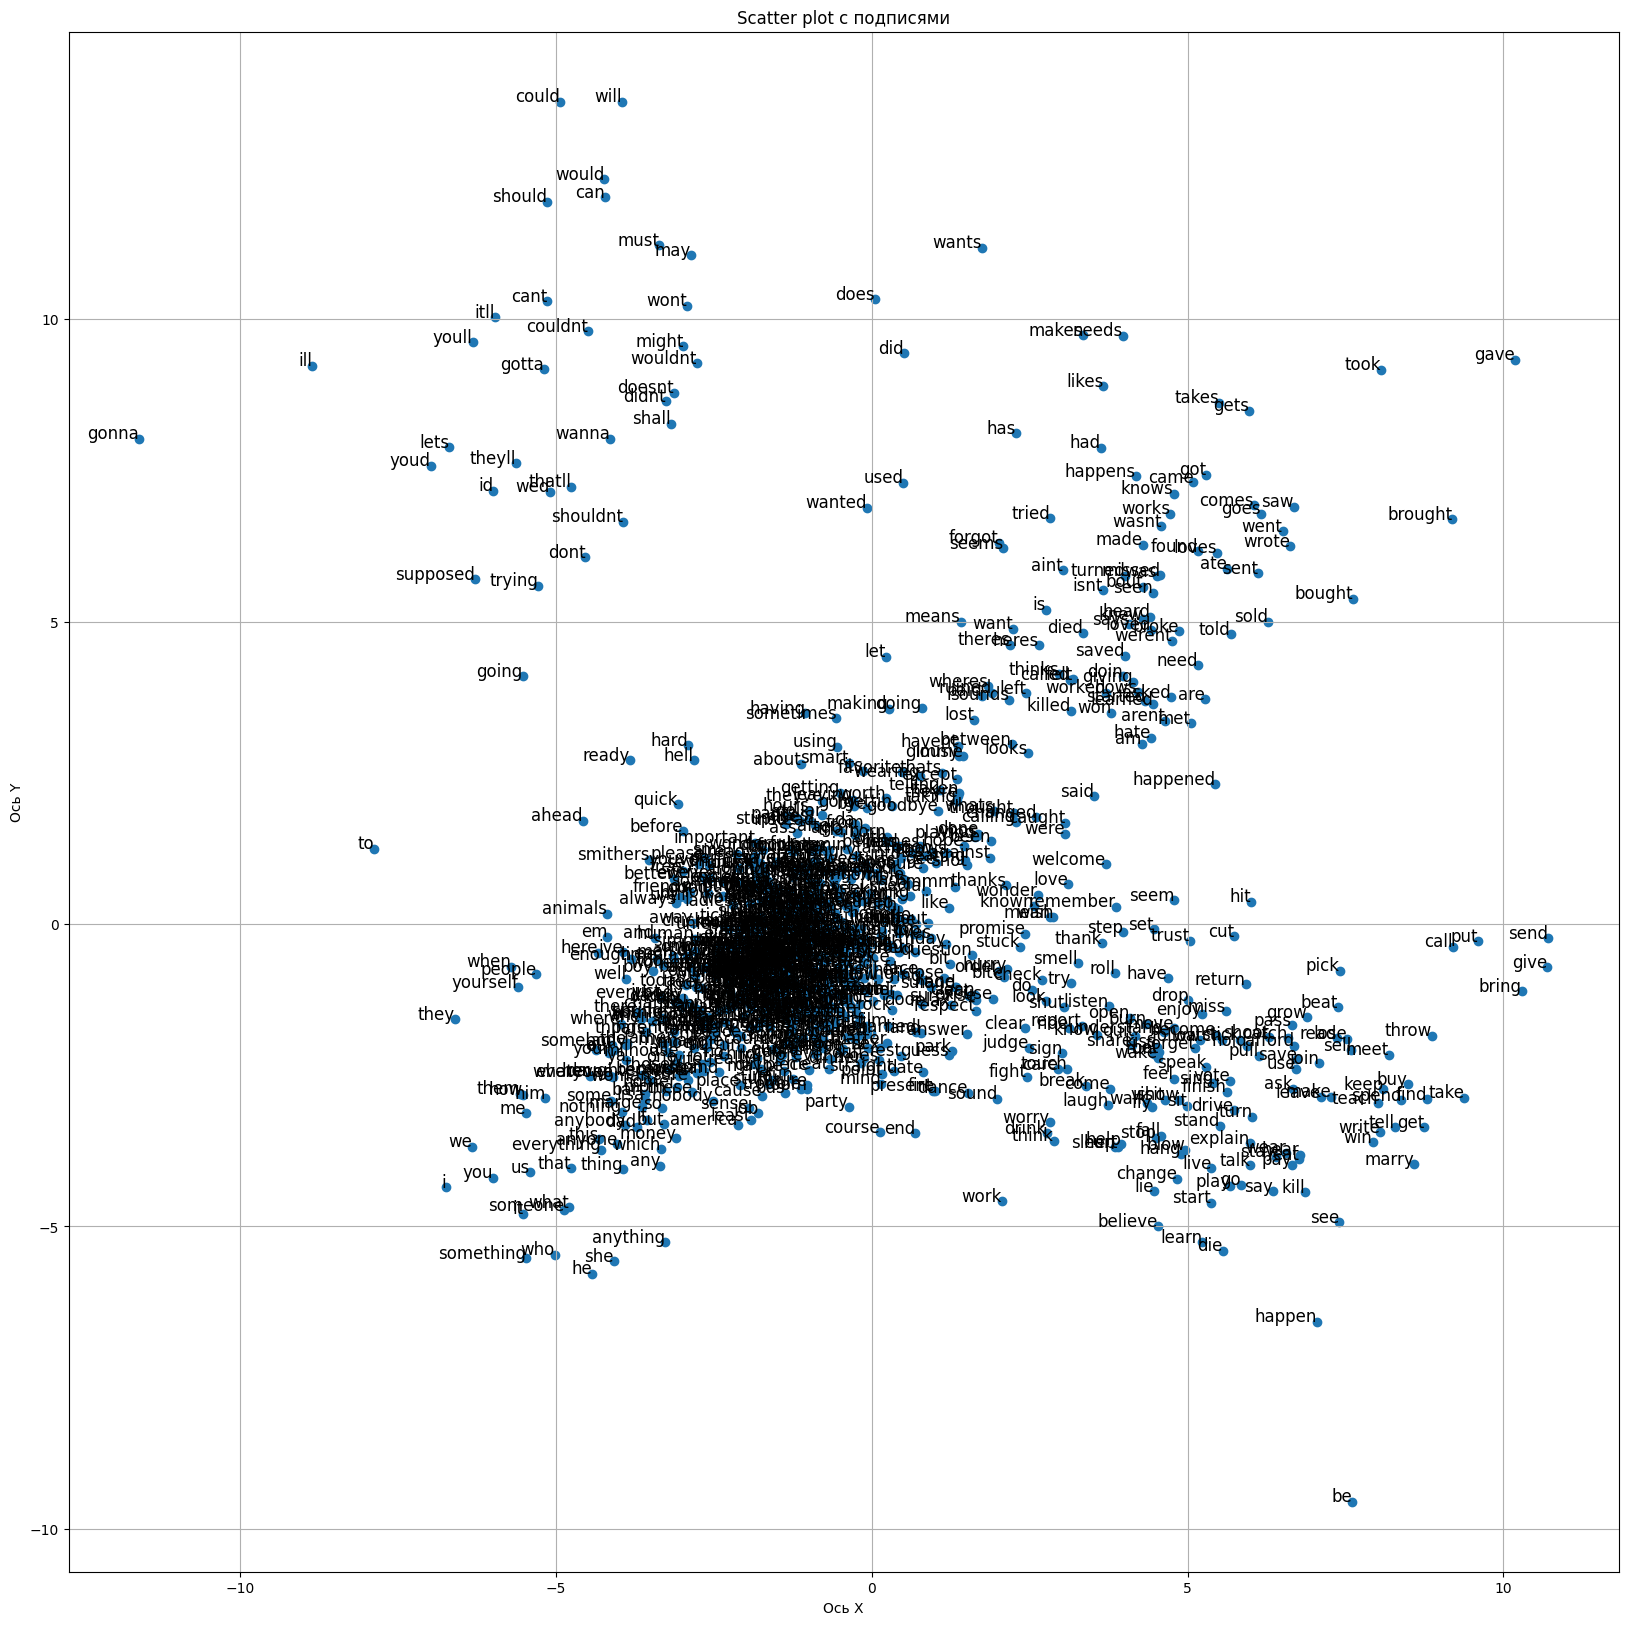

In [ ]:
plt.figure(figsize = [20,20])
plt.scatter(matrix_2d[:, 0], matrix_2d[:, 1])
for i, label in enumerate(top_1000):
    plt.text(matrix_2d[:, 0][i], matrix_2d[:, 1][i], label, fontsize=12, ha='right')  # ha - горизонтальное выравнивание

# Настройка графика
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Scatter plot с подписями')
plt.grid(True)

# Показать график
plt.show()

In [ ]:
homer_minus_marge_plus_bart = word_vectors["homer"] - word_vectors["marge"] + word_vectors["bart"]
homer_minus_marge_plus_bart

array([-3.198534  , -0.70493674,  1.147448  ,  0.39151788,  0.20615315,
        1.3377018 ,  1.2554005 ,  3.114244  ,  0.07245696, -0.7007868 ,
        0.6983061 , -0.40122926, -1.650532  ,  1.4894485 , -1.4609044 ,
        0.12668341,  1.3147871 ,  0.5521294 , -0.6245196 ,  0.11815017,
       -0.59672105, -1.626654  , -1.0865887 ,  0.533481  , -4.363542  ,
       -0.3435067 , -2.3879015 ,  0.6638925 , -0.70858467,  0.9269383 ,
       -0.02390032, -1.2942806 ,  1.5388792 ,  0.3222791 , -2.409418  ,
       -0.24707732, -0.23455954,  1.9396856 ,  0.28614938, -1.9529366 ,
       -0.03198195,  1.2319384 , -0.3984253 ,  0.22676009,  0.16040961,
        1.5161785 ,  0.1534501 ,  1.4408088 ,  1.3579452 ,  1.1951838 ,
       -0.15746298, -1.0626621 ,  2.0431356 ,  2.6557374 , -0.39376912,
       -0.50413287,  0.15373424,  1.5920461 , -1.0567961 ,  2.0030653 ,
       -0.7267431 , -0.79424816,  2.5292797 ,  0.02375084,  0.93498534,
       -2.2066188 ,  0.15797353,  0.61182654,  0.17014459, -1.14

In [ ]:
word_vectors.similar_by_vector(homer_minus_marge_plus_bart, topn = 10)

[('bart', 0.7519841194152832),
 ('homer', 0.5717407464981079),
 ('dad', 0.34802353382110596),
 ('father', 0.2599256634712219),
 ('boy', 0.2587185204029083),
 ('lisa', 0.25776103138923645),
 ('son', 0.2572271227836609),
 ('milhouse', 0.24860930442810059),
 ('grampa', 0.24538157880306244),
 ('us', 0.2416386902332306)]

In [ ]:
bart_minus_lisa_plus_school =  word_vectors["bart"] - word_vectors["lisa"] + word_vectors["school"]
bart_minus_lisa_plus_school

array([-7.10747719e-01, -3.01480126e+00,  1.93534648e+00,  3.60233247e-01,
       -2.36694002e+00,  1.65226674e+00,  4.48346138e-03, -5.10612488e-01,
        1.41033304e+00, -1.15933406e+00,  3.29697800e+00, -2.83628911e-01,
       -1.96181691e+00,  2.47921395e+00, -1.05953217e-01, -2.00910282e+00,
        2.25308371e+00, -4.97364855e+00,  2.25638062e-01, -5.08214891e-01,
       -1.13626754e+00,  1.86584163e+00,  9.96036887e-01,  6.89139068e-02,
        8.75399172e-01, -2.73855352e+00, -4.69596195e+00,  2.92400599e+00,
       -4.36097443e-01,  2.08231974e+00,  6.45189345e-01,  4.44850683e-01,
        8.51973236e-01, -8.83551240e-01,  2.66067564e-01, -2.10091305e+00,
       -1.08075976e+00, -1.46262097e+00,  1.44378161e+00, -1.37010956e+00,
       -1.09049892e+00,  3.04062057e+00, -3.30393887e+00, -1.78431082e+00,
        1.00036025e+00, -3.67435277e-01,  5.18530130e-01,  8.23154330e-01,
       -1.34506512e+00,  2.93137074e-01, -1.18450356e+00, -2.24643278e+00,
       -1.27050245e+00,  

In [ ]:
word_vectors.similar_by_vector(bart_minus_lisa_plus_school, topn = 10)

[('school', 0.80846107006073),
 ('bart', 0.337919145822525),
 ('church', 0.3056599199771881),
 ('schools', 0.25694751739501953),
 ('class', 0.24722599983215332),
 ('circus', 0.24484463036060333),
 ('recital', 0.24377508461475372),
 ('impossibly', 0.24098065495491028),
 ('father', 0.2406863421201706),
 ('store', 0.24058181047439575)]

In [ ]:
marge_minus_homer_plus_home =  word_vectors["marge"] - word_vectors["homer"] + word_vectors["home"]
marge_minus_homer_plus_home

array([-0.11265469, -0.81861115,  1.0865009 , -0.6811528 ,  0.20426226,
       -2.0389502 , -1.4202137 , -3.4750586 , -0.15214676,  0.21142054,
        0.33228204,  3.260414  ,  1.6542823 , -1.556731  ,  1.1254512 ,
        0.29924506, -3.6559706 ,  0.8828383 ,  2.1166825 , -2.0996451 ,
        1.3530705 ,  0.8345897 , -1.5497919 , -2.7771893 , -0.10998726,
        0.03423034,  0.8139997 ,  2.6949923 ,  2.2064977 ,  1.3140477 ,
        0.24308121,  2.3879867 , -1.224865  , -2.146432  ,  2.0827549 ,
       -0.78559005, -2.1028903 , -1.5571761 ,  1.5664194 , -0.09439945,
        0.9494055 ,  1.2691789 ,  0.34125632, -0.42515075, -0.7827064 ,
       -0.32571918, -0.7173283 , -1.1567695 ,  2.4586153 , -1.7664828 ,
        1.1724247 , -1.0900068 ,  0.30774295, -2.9730277 , -2.0675967 ,
        1.3732483 , -0.70424765, -0.90848875,  1.3638632 , -0.7200364 ,
       -0.03936472,  0.14159201, -2.7153041 , -2.024049  , -0.4849011 ,
        0.13530311, -0.4399615 , -0.01260081, -0.52106833,  1.21

In [ ]:
word_vectors.similar_by_vector(marge_minus_homer_plus_home, topn = 10)

[('home', 0.8467944264411926),
 ('marge', 0.4002223610877991),
 ('upstairs', 0.3006645739078522),
 ('back', 0.29881927371025085),
 ('out', 0.2762010395526886),
 ('mom', 0.2738349735736847),
 ('together', 0.26049721240997314),
 ('parents', 0.2454320341348648),
 ('school', 0.24120308458805084),
 ('away', 0.23574194312095642)]

In [ ]:
char_normal_dataset = dataset[["character_id","normalized_text"]]
char_normal_dataset.head(10)

character_id                                    normalized_text
0         464.0  no actually it was a little of both sometimes ...
1           9.0                                wheres mr bergstrom
2         464.0  i dont know although id sure like to talk to h...
3           9.0                          that life is worth living
4          40.0  the polls will be open from now until the end ...
5          38.0           i dont think theres anything left to say
6          40.0                                               bart
7           8.0                      victory party under the slide
8           NaN                                                NaN
9           9.0                          mr bergstrom mr bergstrom

In [ ]:
char_normal_dataset_dropna = char_normal_dataset.dropna()
char_normal_dataset_dropna.head(10)

character_id                                    normalized_text
0          464.0  no actually it was a little of both sometimes ...
1            9.0                                wheres mr bergstrom
2          464.0  i dont know although id sure like to talk to h...
3            9.0                          that life is worth living
4           40.0  the polls will be open from now until the end ...
5           38.0           i dont think theres anything left to say
6           40.0                                               bart
7            8.0                      victory party under the slide
9            9.0                          mr bergstrom mr bergstrom
10         469.0  hey hey he moved out this morning he must have...

In [ ]:
char_normal_dataset_dropna["character_id"] = char_normal_dataset_dropna["character_id"].astype(int)
char_normal_dataset_dropna.head(10)

<ipython-input-29-6172e03b42c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_normal_dataset_dropna["character_id"] = char_normal_dataset_dropna["character_id"].astype(int)


character_id                                    normalized_text
0            464  no actually it was a little of both sometimes ...
1              9                                wheres mr bergstrom
2            464  i dont know although id sure like to talk to h...
3              9                          that life is worth living
4             40  the polls will be open from now until the end ...
5             38           i dont think theres anything left to say
6             40                                               bart
7              8                      victory party under the slide
9              9                          mr bergstrom mr bergstrom
10           469  hey hey he moved out this morning he must have...

In [ ]:
# 8 - барт, лиза - 9
lisa_bart_dataset = char_normal_dataset_dropna[(char_normal_dataset_dropna["character_id"] == 8) | (char_normal_dataset_dropna["character_id"] == 9)]
lisa_bart_dataset.head(10)

character_id                                    normalized_text
1              9                                wheres mr bergstrom
3              9                          that life is worth living
7              8                      victory party under the slide
9              9                          mr bergstrom mr bergstrom
11             9                 do you know where i could find him
13             9  the train how like him traditional yet environ...
15             9                           i see he touched you too
17             8                       hey thanks for your vote man
19             8  well you got that right thanks for your vote g...
21             8  well dont sweat it just so long as a couple of...

In [ ]:
lisa_bart_dataset["character_id"].replace({8: 0, 9: 1}, inplace = True)
lisa_bart_dataset.head(10)

<ipython-input-31-28d39bf11e57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lisa_bart_dataset["character_id"].replace({8: 0, 9: 1}, inplace = True)
<ipython-input-31-28d39bf11e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisa_bart_dataset["character_id"].replace({8: 0, 9: 1}, inplace = True)


character_id                                    normalized_text
1              1                                wheres mr bergstrom
3              1                          that life is worth living
7              0                      victory party under the slide
9              1                          mr bergstrom mr bergstrom
11             1                 do you know where i could find him
13             1  the train how like him traditional yet environ...
15             1                           i see he touched you too
17             0                       hey thanks for your vote man
19             0  well you got that right thanks for your vote g...
21             0  well dont sweat it just so long as a couple of...

In [ ]:
lisa_bart_dataset["normalized_text"].apply(lambda x: len(x.split())).max()

75

In [ ]:
def string_vec(s):
    result = []
    for word in s.split():
        if word not in word_vectors:
            result.append(np.zeros(300))
        else:
            result.append(word_vectors[word])
    len_ost = 75 - len(result)
    for _ in range(len_ost):
        result.append(np.zeros(300))
    result = np.row_stack(result)
    return result

In [ ]:
string_vec("wheres mr bergstrom")  # матрица 75*150 (максимальное кол-во слов на размерность эмбеддинга)

array([[ 3.01133347, -0.38650352, -1.75190282, ...,  0.51477551,
         0.88908434, -0.85191208],
       [-3.20857215, -0.65428096,  2.35521865, ..., -0.19917649,
         1.91292953,  2.2933898 ],
       [ 0.40295541,  1.01609468,  0.98083764, ...,  0.6816743 ,
        -0.55341154, -0.48502222],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
lisa_bart_dataset["vectorized_text"] = lisa_bart_dataset["normalized_text"].apply(string_vec)
lisa_bart_dataset

<ipython-input-35-e4dd8cef07ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisa_bart_dataset["vectorized_text"] = lisa_bart_dataset["normalized_text"].apply(string_vec)


character_id                                    normalized_text  \
1                  1                                wheres mr bergstrom   
3                  1                          that life is worth living   
7                  0                      victory party under the slide   
9                  1                          mr bergstrom mr bergstrom   
11                 1                 do you know where i could find him   
...              ...                                                ...   
157597             1                                   can we have wine   
157599             1                                    can i have wine   
157601             1                         does bart have to be there   
157603             1                             can we do it this week   
157605             1  mr bergstrom we request the pleasure of your c...   

                                          vectorized_text  
1       [[3.011333465576172, -0.38650351762771606, -1....  
3       [[-0.6725773215293884, 0.455346941947937, -0.5...  
7       [[-1.1298047304153442, -0.47332271933555603, 1...  
9       [[-3.2085721492767334, -0.654280960559845, 2.3...  
11      [[-0.10390503704547882, 0.8583706617355347, -1...  
...                                                   ...  
157597  [[-1.3644047975540161, 0.7066446542739868, 0.6...  
157599  [[-1.3644047975540161, 0.7066446542739868, 0.6...  
157601  [[1.659938931465149, -0.9852839112281799, 0.10...  
157603  [[-1.3644047975540161, 0.7066446542739868, 0.6...  
157605  [[-3.2085721492767334, -0.654280960559845, 2.3...  

[23987 rows x 3 columns]

In [ ]:
lisa_bart_dataset["character_id"].value_counts()

character_id
0    13149
1    10838
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(lisa_bart_dataset["vectorized_text"], lisa_bart_dataset["character_id"], train_size = 0.8, random_state = 3464)

In [ ]:
y_train = torch.Tensor(y_train.values)   # переводим формат из пандас сериес в тензор
y_test = torch.Tensor(y_test.values)

In [ ]:
X_train = np.row_stack(X_train.to_list()).reshape((-1, 75,300))   # делаем трехмерный тензор

In [ ]:
X_train.shape

(19189, 75, 300)

In [ ]:
X_train = torch.Tensor(X_train)             # переводим тензор нумпай в тензор пайторча

In [ ]:
X_test = np.row_stack(X_test.to_list()).reshape((-1, 75, 300))
X_test = torch.Tensor(X_test)

In [ ]:
BATCH_SIZE = 64
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_data = torch.utils.data.DataLoader(train_dataset, BATCH_SIZE, shuffle=True)

In [ ]:
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_data = torch.utils.data.DataLoader(test_dataset, BATCH_SIZE, shuffle=True)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, rnnClass, embedding_size, num_hiddens, num_layers):
        super().__init__()

        self.num_hiddens = num_hiddens
        self.hidden = rnnClass(embedding_size, num_hiddens, batch_first=True, num_layers = num_layers)
        self.ll = nn.Linear(num_hiddens, num_hiddens)
        self.output = nn.Linear(num_hiddens, 1)

    def forward(self, X):
        _, (state, _ ) = self.hidden(X)
        predictions = self.ll(state[0])
        predictions = nn.functional.relu(predictions)
        predictions = self.output(predictions)
        predictions = nn.functional.sigmoid(predictions)
        return predictions

In [ ]:
model = NeuralNetwork(nn.LSTM, 300, 128, 2)

In [ ]:
model

NeuralNetwork(
  (hidden): LSTM(300, 128, num_layers=2, batch_first=True)
  (ll): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.BCELoss()

In [ ]:
def train_one_epoch(train_data, test_data):
    for x_batch, y_batch in train_data:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output.reshape(-1), y_batch)
        loss.backward()
        optimizer.step()
    print(loss)

In [ ]:
def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in dataloader:

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        preds = (outputs > 0.5)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds)

    return epoch_loss, epoch_acc, precision, recall, f1

In [ ]:
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:

            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)

            preds = (outputs > 0.5)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds)

    return epoch_loss, epoch_acc, precision, recall, f1

In [ ]:
# Параметры обучения
num_epochs = 10

# История обучения
history = {
    'train_loss': [],
    'train_acc': [],
    'train_precision': [],
    'train_recall': [],
    'train_f1': [],
    'test_loss': [],
    'test_acc': [],
    'test_precision': [],
    'test_recall': [],
    'test_f1': []
}

# Сохранение лучшего чекпойнта
best_val_loss = float('inf')
checkpoint_path = 'best_model.pth'

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    train_loss, train_acc, train_precision, train_recall, train_f1 = train_epoch(model, train_data, criterion, optimizer)
    test_loss, test_acc, test_precision, test_recall, test_f1 = evaluate(model, test_data, criterion)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['train_precision'].append(train_precision[0])
    history['train_recall'].append(train_recall[0])
    history['train_f1'].append(train_f1[0])
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)
    history['test_precision'].append(test_precision[0])
    history['test_recall'].append(test_recall[0])
    history['test_f1'].append(test_f1[0])

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train Precision: {train_precision[0]:.4f}, Train Recall: {train_recall[0]:.4f}, Train F1: {train_f1[0]:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test Precision: {test_precision[0]:.4f}, Test Recall: {test_recall[0]:.4f}, Test F1: {test_f1[0]:.4f}")

    # Сохранение лучшего чекпойнта
    if test_loss < best_val_loss:
        best_val_loss = test_loss
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Saved best model with validation loss: {best_val_loss:.4f}")

print("Training complete.")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6890, Train Acc: 0.5465, Train Precision: 0.5472, Train Recall: 0.9960, Train F1: 0.7063
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Saved best model with validation loss: 0.6880
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6889, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6891, Train Acc: 0.5480, Train Precision: 0.5479, Train Recall: 0.9990, Train F1: 0.7076
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 4/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6887, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6886, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 6/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6886, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 7/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6886, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6880, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 8/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6886, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6883, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 0.6886, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6881, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Epoch 10/10
Train Loss: 0.6885, Train Acc: 0.5477, Train Precision: 0.5476, Train Recall: 1.0000, Train F1: 0.7077
Test Loss: 0.6881, Test Acc: 0.5506, Test Precision: 0.5506, Test Recall: 1.0000, Test F1: 0.7102
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
